# <div align="center"> Projet Machine Learning 2</div>

#### <div>Le but de ce projet est d'effectuer une classification d'images du jeu de données de cifar-10.</div>



#### Dans ce notebook nous utilisons la librairie Keras.


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

#            --------------------  Fonctions -----------
              # plot_training_loss(fit)
              # plot_accuracy(fit)
              # plot_matrix_corr(fit,confusion_matrice,class_names)
        
# ------------------------- Pour initialiser les modèles ---------------
def plot_training_loss(fit,nom=""):
    plt.plot(fit.history['loss'])
    plt.plot(fit.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    plt.savefig("training loss"+"-"+nom)
    #plt.show()
def plot_accuracy(fit,nom=""):
    plt.plot(fit.history['accuracy'])
    plt.plot(fit.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.savefig("training accuracy"+"-"+nom)
    #plt.show()
def plot_matrix_corr(fit,confusion_matrice,class_names,nom=""):
    sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted', fontsize=12)
    plt.title("Correlation matrix")
    plt.ylabel('True', fontsize=12)
    plt.savefig("correlationmatrix"+nom)
    #plt.show()

#                 ----------  Pour lancer les models sauvegardés --------------
def plot_training_loss_save(history,nom=""):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    plt.savefig("training loss"+ "-"+nom)
    plt.show()

def plot_accuracy_save(history):
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

def plot_matrix_corr_save(history,confusion_matrice,class_names):
    sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted', fontsize=12)
    plt.title("Correlation matrix")
    plt.ylabel('True', fontsize=12)
    plt.show()

#                  -----      <!> A généraliser sur les modèles  -----
# epoch_final = 100    +  




### 1. Chargement, exploration & visualistion des données de cifar-10


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data();
X_train.shape
X_test.shape 
# Entrainement image 32 x 32 ; 3 : rgb channels ; 50 000 : nb images train

(10000, 32, 32, 3)

In [4]:
X_test.shape
# Test image 32 x 32 ; 3 : rgb channels ; 10 000 : nb images test

(10000, 32, 32, 3)

In [5]:
X_train[0]; # 3 dimensional array
y_train.shape

(50000, 1)

In [6]:
#y_train.shape  50 000 sample 1 dimensional array
# 6 <-> frog ; 9 <-> truck ; 4 <-> deer ; 1 <-> automobile

# 5 premiers éléments y_train[:5]
# on remarque que chq élément est imbriqué dans un array exemple :  [[6],[9],...] et non [6,9,...] 

# il faut pour cela redimensionner via reshape(-1,) pour 1 dim array
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [7]:
# classe 10 éléments 0 à 9
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y, index):
# redim taille image
    plt.figure(figsize = (15,2))
# voir à quoi ressemble une image
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

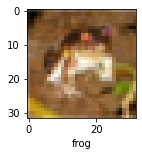

In [9]:
plot_sample(X_train,y_train,0)

# plot_sample(X_train,y_train,1)

#### Normalisation des données:


In [10]:
# Normalizer data
X_train = X_train/255
X_test = X_test/255

### 2. Construction & evaluation des modéles

#### 2.1 Modéle 1 => modele ann 🖣
(Flaten)+(Dense+Relu)+(Dense+Relu)+(Dense+Sigmoid)

In [12]:
# Construisons le modèle ANN (Artificial neural network)

# input image 32 x 32 x 3
#  2 deep layers : 1rst deep layer with 3000 neurons, 2nd deep layer 1000 neurons avc fct relu
# Last layer : 10 neurons avec fct sigmoid <-> 10 categories de notre classes 'classes'

# sigmoïd <-> s(z_k) = 1/ (1+ e^(-z_k))

ann = models.Sequential(
[
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# 7.b.2
# Optimizer SGD <-> Gradient stochastique  ;   fct de perte = entropie croisée parsemé par catégorie
# Mesure <-> precision

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# on entraine les neurons
# 3 decembre  epochs = 20
fit_ann=ann.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test))



# accuracy faible 49.5% sur samples train ;    loss : 1.4320


Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8159 - accuracy: 0.3552 - val_loss: 1.6563 - val_accuracy: 0.4083
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6236 - accuracy: 0.4279 - val_loss: 1.6943 - val_accuracy: 0.3826
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5437 - accuracy: 0.4538 - val_loss: 1.5355 - val_accuracy: 0.4507
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4853 - accuracy: 0.4746 - val_loss: 1.5759 - val_accuracy: 0.4417
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4350 - accuracy: 0.4949 - val_loss: 1.4638 - val_accuracy: 0.4734
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3925 - accuracy: 0.5120 - val_loss: 1.4774 - val_accuracy: 0.4674
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3533 - accuracy: 0.5241 - val_loss: 1.5036 - val_ac

In [13]:
#import pickle
#  sauvegarder notre modèle ANN_Model_1.h5
# ANN_Model_1 : 5 epochs
# ANN_Model_2 : 20 epochs
#ann.save('ANN_Model_2.h5')
# on sauvegarde le modèle.fit
#with open('ANN_Model_2_fit', 'wb') as file_pi:
#    pickle.dump(fit_ann.history, file_pi)

In [14]:
# relancer le model_1 ANN directement ici
#from keras.models import load_model

# ouvrir via pickle
#history = pickle.load(open('ANN_Model_1_fit',"rb"))


#ann_model_1 = load_model('ANN_Model_1.h5')

#fit_ann_2 = ann_model_1.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))

# <!> utiliser plot training_loss_save
#plot_training_loss_save(history)



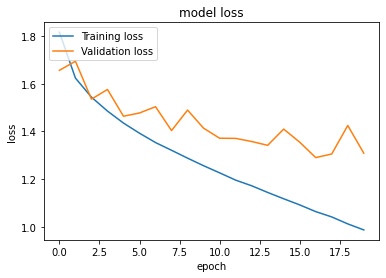

In [15]:
plot_training_loss(fit_ann, "20 epochs");


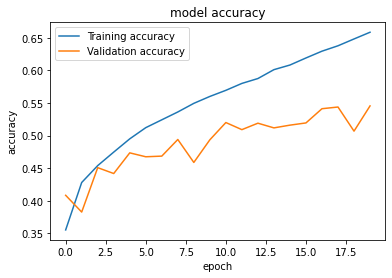

In [16]:
plot_accuracy(fit_ann,"20epochs")

In [17]:
# Evaluons notre modèle sur les données test
ann.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


313/313 [==============================] - 1s 4ms/step - loss: 1.3089 - accuracy: 0.5454


[1.308862328529358, 0.5454000234603882]

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# 
# Recal = TruePositives / (TruePositives + FalseNegatives)
# hausse Recal => minimise faux négatif

# Mesure F = (2 * Précision * Rappel) / (Précision + Rappel)
# Mesure F ~ 0 => precision + rappel médiocre
# Mesure F1 ~ 1 => précision + rappel excellent

# Precision = TruePositives / (TruePositives + FalsePositives)
# hausse Precision => minimise faux positif

# Classification report ANN

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

Classfication Report 
               precision    recall  f1-score   support

           0       0.64      0.63      0.63      1000
           1       0.67      0.64      0.66      1000
           2       0.45      0.45      0.45      1000
           3       0.38      0.32      0.35      1000
           4       0.54      0.41      0.46      1000
           5       0.38      0.54      0.45      1000
           6       0.54      0.68      0.60      1000
           7       0.63      0.61      0.62      1000
           8       0.79      0.54      0.64      1000
           9       0.54      0.64      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000



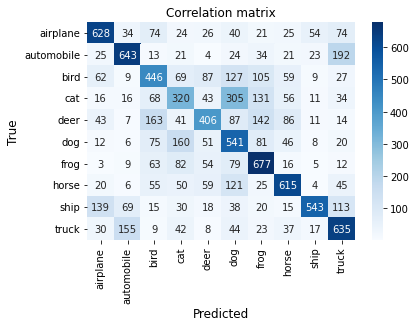

In [19]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_ann,conf,classes,"ANN_20epochs")

#### 2.1 Modéle 2 => modele cnn 🖣
(Convolution+Relu) + (Pooling) + (Convolution+Relu) + (Flaten) + (Dense+Relu) + (Dense+softmax)

In [30]:
# CNN <-> Feature Extraction + Classification

# Feature Extraction <-> (1) Convolution + Relu (oreille,yeux) -> (2) Pooling  -> (3) Convo + Relu(head,..)
# -> (4) Pooling  .. flatten
# Classification <-> Is it this category ?

# softmax <-> s(k)= e^(z_k)/ sum(e^(z_i),{i=1..n})
# relu <-> r(z_k) = max(z_k,0)

cnn = models.Sequential(
[
    #cnn
    
    # (1) Convolution + Relu
    # filters = 32 <=> on peut détecter 32 zones différentes sur l'image
    # kernel_size <=> taille du filtre ici 3 x 3
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    
    # (2) Pooling ici on choisit MaxPooling
    layers.MaxPooling2D((2,2)),
    
    # (3) + (4)
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [31]:
# Optimizer adam <=> optimization algorithm 
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [32]:
# Entrainons model cnn
fit_cnn = cnn.fit(X_train, y_train, epochs = 20,validation_data=(X_test,y_test));

# accuracy  train :  ~ 0.78

Epoch 1/20
1563/1563 [==============================] - 18s 7ms/step - loss: 1.4626 - accuracy: 0.4705 - val_loss: 1.1843 - val_accuracy: 0.5782
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1139 - accuracy: 0.6091 - val_loss: 1.0526 - val_accuracy: 0.6317
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9867 - accuracy: 0.6584 - val_loss: 1.0031 - val_accuracy: 0.6527
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9026 - accuracy: 0.6888 - val_loss: 0.9596 - val_accuracy: 0.6722
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8388 - accuracy: 0.7098 - val_loss: 0.9146 - val_accuracy: 0.6854
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7789 - accuracy: 0.7286 - val_loss: 0.9156 - val_accuracy: 0.6956
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7315 - accuracy: 0.7471 - val_loss: 0.9226 - val_ac

In [36]:
#import pickle

#  sauvegarder notre modèle ANN_Model_1.h5
# CNN_Model_1 : 5 epochs
#cnn.save('CNN_Model_2.h5')
# on sauvegarde le modèle.fit
#with open('CNN_Model_2_fit', 'wb') as file_pi:
#    pickle.dump(fit_cnn.history, file_pi)

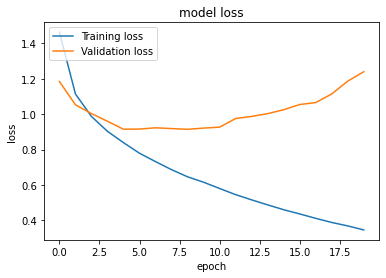

In [35]:
plot_training_loss(fit_cnn,"CNN_20epochs")

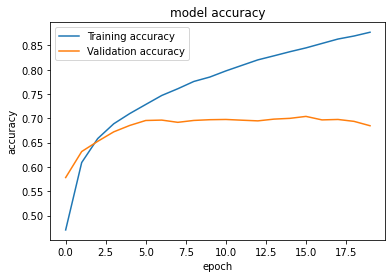

In [37]:
plot_accuracy(fit_cnn,"CNN_20epochs")

In [38]:
cnn.evaluate(X_test, y_test)
# accuracy ~ 70% => bonne précision

313/313 [==============================] - 1s 4ms/step - loss: 1.2396 - accuracy: 0.6848


[1.2395588159561157, 0.6848000288009644]

In [39]:
# Prediction model cnn
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[7.77920377e-06, 8.43093950e-09, 4.73546470e-06, 9.95965123e-01,
        8.14924217e-09, 3.58710741e-03, 6.74561716e-06, 1.04026284e-07,
        4.28199302e-04, 3.28037442e-09],
       [6.15279714e-04, 9.76224989e-03, 1.37565166e-07, 9.67210963e-06,
        1.77408772e-08, 2.21039809e-09, 1.53317057e-08, 5.29133022e-11,
        9.89597023e-01, 1.55995385e-05],
       [5.40276617e-02, 4.21474576e-02, 1.36790343e-03, 4.33797389e-02,
        7.52172712e-03, 5.53912978e-05, 1.89700362e-03, 4.55465866e-04,
        8.34006131e-01, 1.51415719e-02],
       [9.98941243e-01, 4.79458322e-06, 1.15855937e-05, 4.22294852e-06,
        1.72132073e-04, 4.56482695e-07, 1.41915609e-06, 5.16909313e-06,
        8.57805077e-04, 1.18075718e-06],
       [1.31582611e-09, 9.60590363e-09, 1.43448422e-02, 4.32640640e-03,
        1.49901018e-01, 1.16421329e-03, 8.30263317e-01, 1.57159107e-07,
        7.13710868e-10, 4.68869210e-09]], dtype=float32)

In [40]:
np.argmax([12,34,67,1,2,88]) # donne l'index de la cellule où le nb est maximum

5

In [41]:
np.argmax(y_pred[0])

3

In [42]:
y_classes = [np.argmax(element) for element in y_pred]

In [43]:
# comparons 15 premières valeurs de y_pred (cnn) avec y_test pour voir ci la prediction s'effectue assez bien
y_classes[:15]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 9, 4, 9, 5, 7, 9]

In [44]:
y_test[:15]


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

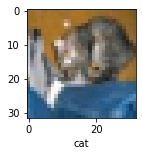

In [45]:
# visualiser la comparaison  pour voir les difficultés d'apprentissage
plot_sample(X_test,y_test,0)

In [46]:
classes[y_classes[0]]

'cat'

In [47]:
# Classification CNN
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.89      0.69      0.78      1000
           2       0.62      0.52      0.56      1000
           3       0.51      0.46      0.48      1000
           4       0.61      0.68      0.64      1000
           5       0.55      0.66      0.60      1000
           6       0.65      0.85      0.74      1000
           7       0.81      0.67      0.73      1000
           8       0.86      0.73      0.79      1000
           9       0.72      0.85      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



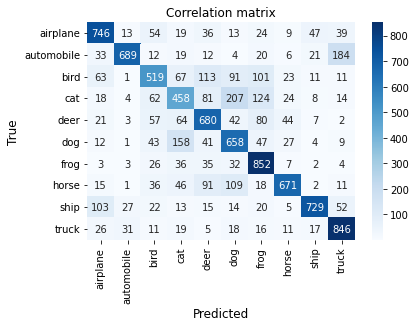

In [48]:

conf=confusion_matrix(y_test,y_classes)

plot_matrix_corr (fit_cnn,conf,classes,"correlation_matrix_CNN_20epochs")

### 3. Tentative d'amelioration des modeles

In [ ]:
#
# 
#           ------ Essayons d'améliorer le modèle ANN en changeant les params   ----



#### 3.1 Modele ann V2
On reprend notre modéle Ann et tente de l'ameliorer en changeant l'optimiser. 

In [14]:
# Construisons le modèle ANN_V2

# input image 32 x 32 x 3
#  2 deep layers : 1rst deep layer with 3000 neurons, 2nd deep layer 1000 neurons avc fct relu
# Last layer : 10 neurons avec fct sigmoid <-> 10 categories de notre classes 'classes'

# sigmoïd <-> s(z_k) = 1/ (1+ e^(-z_k))

ann_v2 = models.Sequential(
[
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# 7.b.2
# Optimizer Adam <-> Gradient stochastique  ;   fct de perte = entropie croisée parsemé par catégorie
# Mesure <-> precision

ann_v2.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# on entraine les neurons
# 7.b.4 <=> epochs = 5
fit_ann_v2=ann_v2.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test))

# accuracy faible 49.5% sur samples train ;    loss : 1.4320


Epoch 1/20
1563/1563 [==============================] - 16s 9ms/step - loss: 1.8731 - accuracy: 0.3310 - val_loss: 1.7532 - val_accuracy: 0.3684
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6678 - accuracy: 0.3972 - val_loss: 1.6338 - val_accuracy: 0.4083
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5885 - accuracy: 0.4292 - val_loss: 1.5713 - val_accuracy: 0.4374
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5393 - accuracy: 0.4467 - val_loss: 1.5176 - val_accuracy: 0.4513
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5016 - accuracy: 0.4629 - val_loss: 1.5612 - val_accuracy: 0.4468
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4709 - accuracy: 0.4726 - val_loss: 1.5109 - val_accuracy: 0.4552
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4430 - accuracy: 0.4822 - val_loss: 1.5068 - val_ac

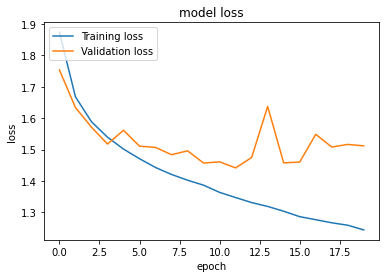

In [15]:
plot_training_loss(fit_ann_v2,'ann_V2')

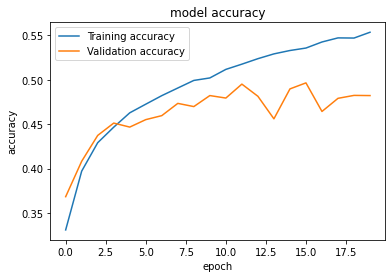

In [16]:
plot_accuracy(fit_ann_v2,'ann_v2')

In [17]:
# Evaluons notre modèle sur les données test
ann_v2.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


313/313 [==============================] - 1s 4ms/step - loss: 1.5118 - accuracy: 0.4823


[1.5118310451507568, 0.4823000133037567]

In [18]:
# Evaluons notre modèle sur les données test
ann_v2.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


313/313 [==============================] - 1s 5ms/step - loss: 1.5118 - accuracy: 0.4823


[1.5118310451507568, 0.4823000133037567]

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =ann_v2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# 
# Recal = TruePositives / (TruePositives + FalseNegatives)
# hausse Recal => minimise faux négatif

# Mesure F = (2 * Précision * Rappel) / (Précision + Rappel)
# Mesure F ~ 0 => precision + rappel médiocre
# Mesure F1 ~ 1 => précision + rappel excellent

# Precision = TruePositives / (TruePositives + FalsePositives)
# hausse Precision => minimise faux positif

# Classification report ANN

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

Classfication Report 
               precision    recall  f1-score   support

           0       0.58      0.44      0.50      1000
           1       0.54      0.69      0.61      1000
           2       0.41      0.29      0.34      1000
           3       0.34      0.29      0.32      1000
           4       0.42      0.46      0.44      1000
           5       0.41      0.42      0.41      1000
           6       0.55      0.51      0.53      1000
           7       0.55      0.51      0.53      1000
           8       0.48      0.74      0.58      1000
           9       0.54      0.48      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



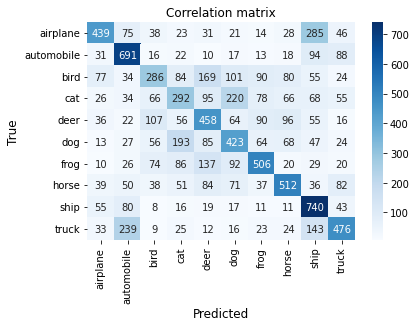

In [20]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_ann_v2,conf,classes,'ann_v2')

In [86]:

#      -------  Model 2 CNN (cnn_v2) ------


In [87]:
# CNN <-> Feature Extraction + Classification

# Feature Extraction <-> (1) Convolution + Relu (oreille,yeux) -> (2) Pooling  -> (3) Convo + Relu(head,..)
# -> (4) Pooling  .. flatten
# Classification <-> Is it this category ?

# softmax <-> s(k)= e^(z_k)/ sum(e^(z_i),{i=1..n})
# relu <-> r(z_k) = max(z_k,0)

cnn_v2 = models.Sequential(
[
    #cnn
    
    # (1) Convolution + Relu
    # filters = 32 <=> on peut détecter 32 zones différentes sur l'image
    # kernel_size <=> taille du filtre ici 3 x 3
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    
    # (2) Pooling ici on choisit MaxPooling
    layers.MaxPooling2D((2,2)),
    
    # (3) + (4)
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') 
])

In [88]:
# Optimizer adam <=> optimization algorithm 
cnn_v2.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [89]:
# Entrainons model cnn
fit_cnn_v2 = cnn_v2.fit(X_train, y_train, epochs = 20,validation_data=(X_test,y_test))

# accuracy  train :  ~ 0.78

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0051 - accuracy: 0.2715 - val_loss: 1.7981 - val_accuracy: 0.3717
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6012 - accuracy: 0.4265 - val_loss: 1.5403 - val_accuracy: 0.4422
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4340 - accuracy: 0.4874 - val_loss: 1.4323 - val_accuracy: 0.4940
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3367 - accuracy: 0.5244 - val_loss: 1.2959 - val_accuracy: 0.5404
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2578 - accuracy: 0.5571 - val_loss: 1.2667 - val_accuracy: 0.5530
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1890 - accuracy: 0.5806 - val_loss: 1.2648 - val_accuracy: 0.5577
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1276 - accuracy: 0.6049 - val_loss: 1.1383 - val_ac

In [90]:
#import pickle
# sauvegarder notre modèle CNN_V2_Model_2.h5
#cnn_v2.save('CNN_V2_Model.h5')
# on sauvegarde le modèle.fit
#with open('CNN_V2_Model_fit', 'wb') as file_pi:
#    pickle.dump(fit_cnn_v2.history, file_pi)

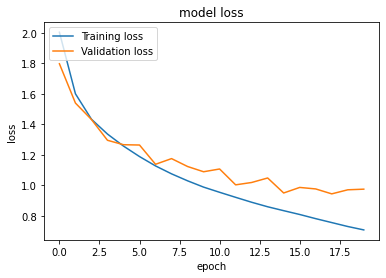

In [91]:
plot_training_loss(fit_cnn_v2,"cnn_v2")

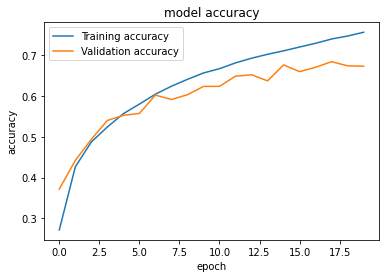

In [92]:
plot_accuracy(fit_cnn_v2,"cnn_v2")

In [93]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
# Evaluons notre modèle sur les données test
cnn_v2.evaluate(X_test, y_test)

y_pred =cnn_v2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Classification report CNN_V2

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step - loss: 0.9750 - accuracy: 0.6737
Classfication Report 
               precision    recall  f1-score   support

           0       0.73      0.70      0.72      1000
           1       0.67      0.86      0.76      1000
           2       0.61      0.55      0.58      1000
           3       0.60      0.41      0.49      1000
           4       0.67      0.57      0.62      1000
           5       0.63      0.57      0.60      1000
           6       0.72      0.78      0.75      1000
           7       0.65      0.79      0.72      1000
           8       0.65      0.87      0.75      1000
           9       0.79      0.63      0.70      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



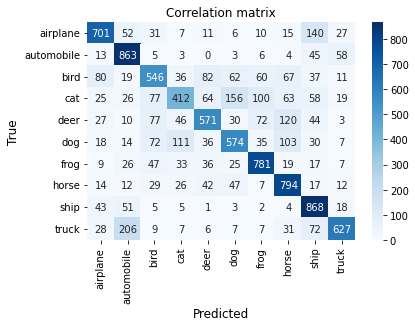

In [94]:
conf=confusion_matrix(y_test,y_pred_classes)

plot_matrix_corr (fit_cnn_v2,conf,classes,'cnn_v2')

In [105]:
#             ------------- Evaluer à partir de la sauvegarde    -------------

# plot_training_loss(fit_cnn_model_2)
        
# plot_accuracy(fit_cnn_model_2)

# cnn_model_2.evaluate(X_test, y_test)


In [ ]:
# ------------------------ Grid Search --------------------------------
#3
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate = 0.01):
    ###################################################################################################################################
    # create model
    #cnn => caractértistiques modéles (TODO)
    model = models.Sequential(
    [layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')])
    optimizer = SGD(learning_rate=learn_rate)
    # Compile model
    model.compile(optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    return model
#########################################################################################################################################
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset => deja fait X_train X_test y_train y_test
X = X_train
Y= y_train
# create model
model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
#optimizer = ['Adam','SGD']
learn_rate =[0.01,0.1,0.3]
epochs = [5, 10]
batch_size = [10, 20]
param_grid = dict(learn_rate=learn_rate,epochs=epochs,batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/5
4000/4000 [==============================] - 23s 4ms/step - loss: 1.8401 - accuracy: 0.3335
Epoch 2/5
4000/4000 [==============================] - 17s 4ms/step - loss: 1.4026 - accuracy: 0.4976
Epoch 3/5
4000/4000 [==============================] - 17s 4ms/step - loss: 1.2261 - accuracy: 0.5689
Epoch 4/5
4000/4000 [==============================] - 17s 4ms/step - loss: 1.1018 - accuracy: 0.6126
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0326 - accuracy: 0.6410
Epoch 1/5
4000/4000 [==============================] - 17s 4ms/step - loss: 1.7844 - accuracy: 0.3516
Epoch 2/5
4000/4000 [==============================] - 17s 4ms/step - loss: 1.3910 - accuracy: 0.5024
Epoch 3/5
4000/4000 [==============================] - 17s 4ms/step - loss: 1.2236 - accuracy: 0.5695
Epoch 4/5
4000/4000 [==============================] - 17s 4ms/step - loss: 1.1010 - accuracy: 0.6139
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0914 -